Main Python code to perform the simulation and display results

In [1]:
import numpy as np
from matplotlib import pyplot as plt, colors as mcolors
from scipy.integrate import solve_ivp
from scipy.constants import G, au
from sklearn.preprocessing import MinMaxScaler

from ctypes import c_void_p, c_double, c_int, CDLL
from numpy.ctypeslib import ndpointer

import barneshut

In [2]:
massfactor = 10**24 # [kg]
scalefactor = 100  # [au]
velocityfactor = 100  # []
accuracy = 0.3

Generate random body system:

In [3]:
count = 100

In [4]:
def massGen():
    for _ in range(count):
        yield abs(np.random.randn())*massfactor

def positionGen():
    for _ in range(count):
        yield np.random.randn(2)*scalefactor*au

def velocityGen():
    for _ in range(count):
        yield np.random.randn(2)*velocityfactor

In [5]:
bodies = zip(masses := np.array([[_ for _ in massGen()]]), positions := np.array([_ for _ in positionGen()]))

In [6]:
velocities = np.array([_ for _ in velocityGen()])

Show data:

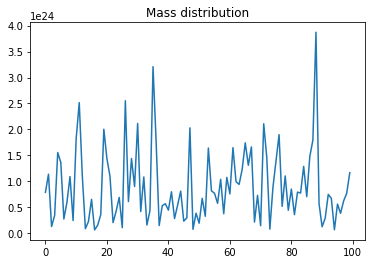

In [7]:
plt.title('Mass distribution')
plt.plot(masses.flatten())

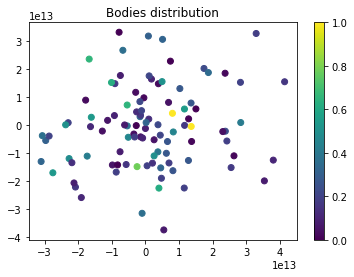

In [8]:
mass_scaler = MinMaxScaler()
cmap = mass_scaler.fit_transform(masses.reshape(-2, 2))
c = mcolors.ColorConverter().to_rgb

plt.title('Bodies distribution')
plt.scatter(positions[:, 0], positions[:, 1], c=cmap)
plt.colorbar()

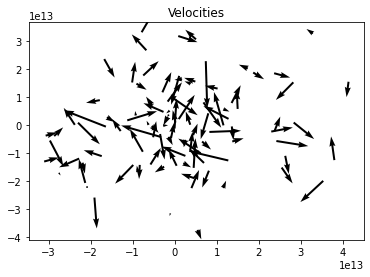

In [9]:
plt.title('Velocities')
plt.quiver(positions[:,0], positions[:,1], velocities[:,0], velocities[:,1])

Compute forces using C++ function:

In [10]:
state = np.concatenate((masses.T, positions), axis=1)

In [11]:
radius = max(abs(positions.flatten())) * 1.1  # Emergency reserve
radius

45537000189113.914

In [12]:
result = np.array(barneshut.getForces(state, count, radius, accuracy)) * G

Computation starting.. 
Conversion.. 
Tree construction..
Force computation.. 
Conversion.. 
Done!
Cleaning up memory.. Memory stack: 0


In [13]:
result

array([[-5.92177798e+12,  7.11986405e+12],
       [ 1.28465905e+13, -1.82680814e+13],
       [-1.38169151e+12,  1.37622098e+12],
       [-1.73118754e+12, -5.95434527e+12],
       [-2.09890741e+12,  4.69168355e+12],
       [-1.17174217e+13, -2.80649307e+12],
       [ 3.21644451e+12, -6.66465087e+11],
       [ 3.37297532e+12, -4.60958619e+12],
       [-7.84427570e+12,  1.76879662e+12],
       [-1.73341339e+12,  9.93638087e+11],
       [ 5.07459544e+13,  1.11927715e+13],
       [ 2.08205295e+13,  2.37324687e+13],
       [-1.70862029e+13, -1.85955007e+13],
       [ 1.89479065e+11, -3.58947009e+11],
       [ 2.09186685e+12,  2.63990262e+10],
       [-8.98656485e+12,  6.85472515e+12],
       [-1.46866578e+12,  1.51102688e+10],
       [ 9.79423877e+11, -6.41977962e+11],
       [-1.11593945e+12,  6.74735917e+11],
       [-3.21872780e+12,  2.46833993e+13],
       [ 3.94334852e+12, -8.01812448e+12],
       [ 7.61117394e+12,  5.12841955e+12],
       [ 2.73038218e+12,  1.07523292e+12],
       [ 3.